In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [50]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [51]:
df.drop(columns=["Unnamed: 0","Booking_ID"], inplace = True) # These columns are not needed for analysis

In [52]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled
29016,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.00,0,Canceled
29017,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.00,1,Not_Canceled
29018,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.00,0,Canceled


In [53]:
df.shape

(29020, 18)

In [54]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [55]:
df.duplicated().sum()  # Check for duplicate rows

np.int64(7661)

In [56]:
df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [57]:
df.duplicated().sum()  # Check for duplicate rows now after removing duplicates

np.int64(0)

In [58]:
df.shape

(21359, 18)

In [59]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [60]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [61]:
df["no_of_children"].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [62]:
df["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [63]:
df["no_of_week_nights"].value_counts()

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [64]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

In [65]:
df["required_car_parking_space"].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [66]:
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [67]:
df["arrival_year"].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

In [68]:
df["arrival_month"].value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In [69]:
df["market_segment_type"].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [70]:
df["no_of_previous_cancellations"].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

In [71]:
df["repeated_guest"].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [72]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [73]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

##### Our data is imbalanced

In [74]:
cat_cols = [
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'market_segment_type',
    'booking_status',
    'repeated_guest',
]

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_cancellations',
            'arrival_year', 'arrival_month', 'arrival_date','lead_time', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests' ]

In [75]:
len(cat_cols)

6

In [76]:
len(num_cols)

12

### DATA ANALYSIS

In [77]:
data = df.copy()

In [78]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### UNIVARIATE ANALYSIS

In [79]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.histplot(data = df, x=column, ax = axes[i][0], kde=True, palette='viridis')
        axes[i][0].set_title(f'Histogram for {column}')

        sns.boxplot(data = df, x=column, ax = axes[i][1], palette='viridis')
        axes[i][1].set_title(f'Boxplot for {column}')
    plt.tight_layout()
    plt.show()

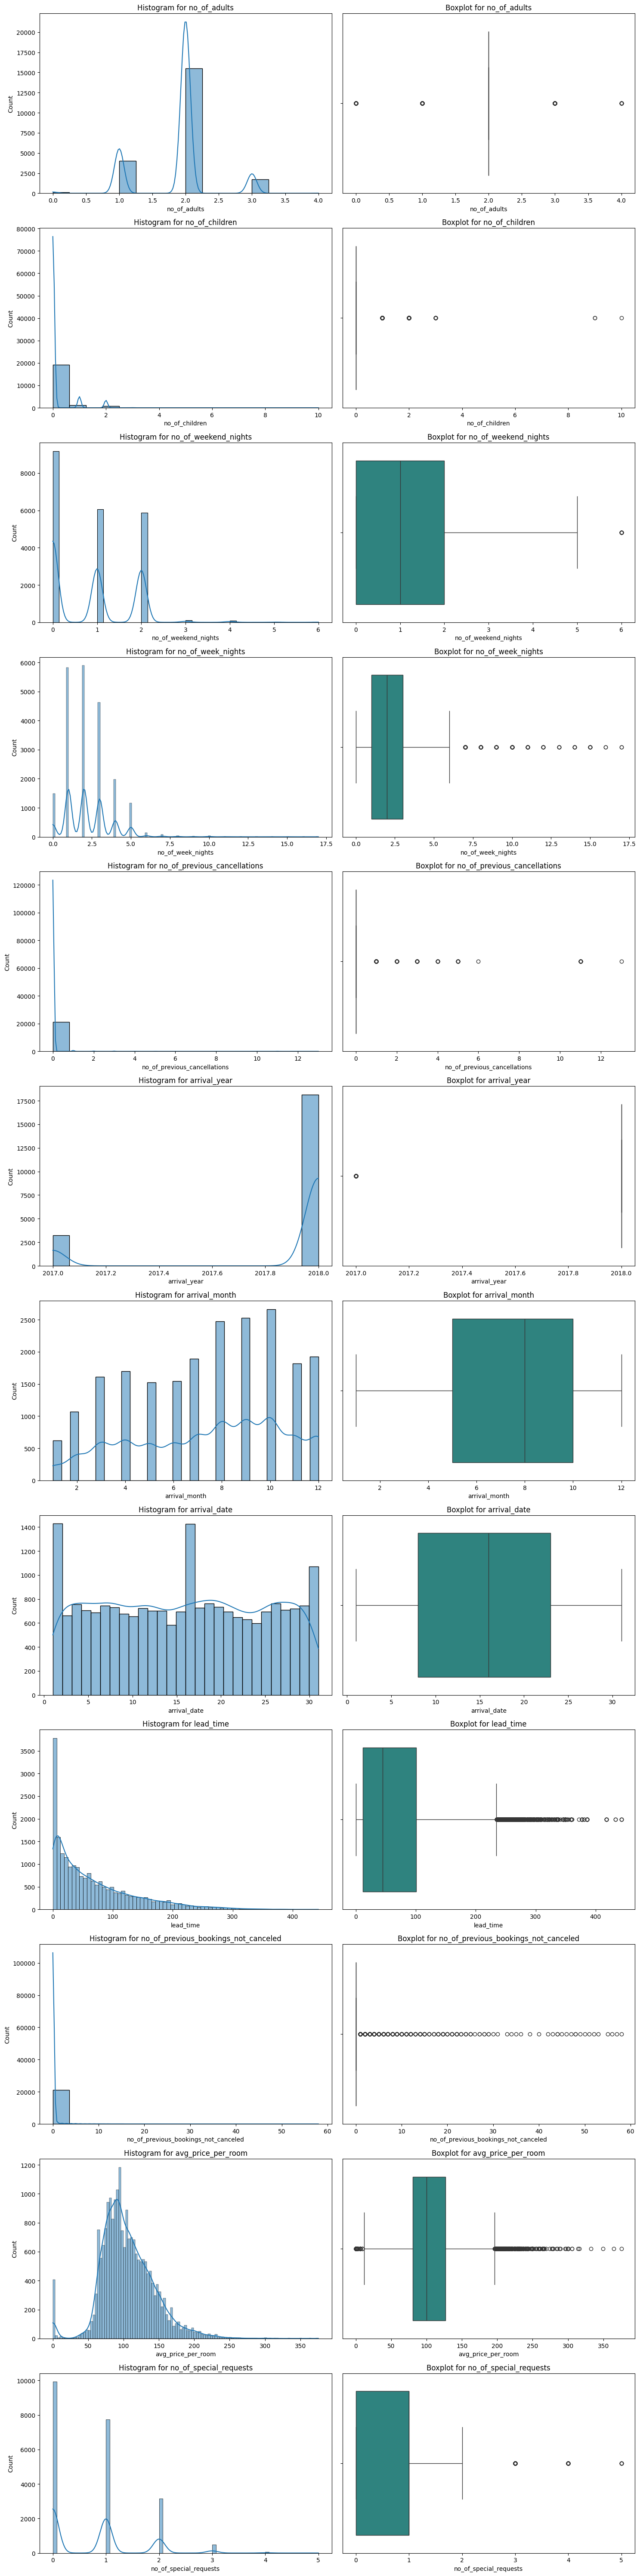

In [80]:
num_plot_dist(data, num_cols)

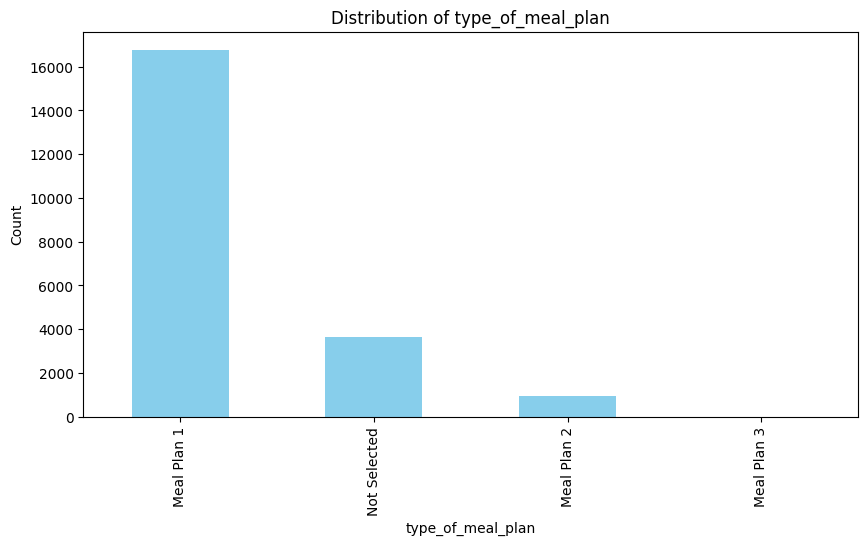

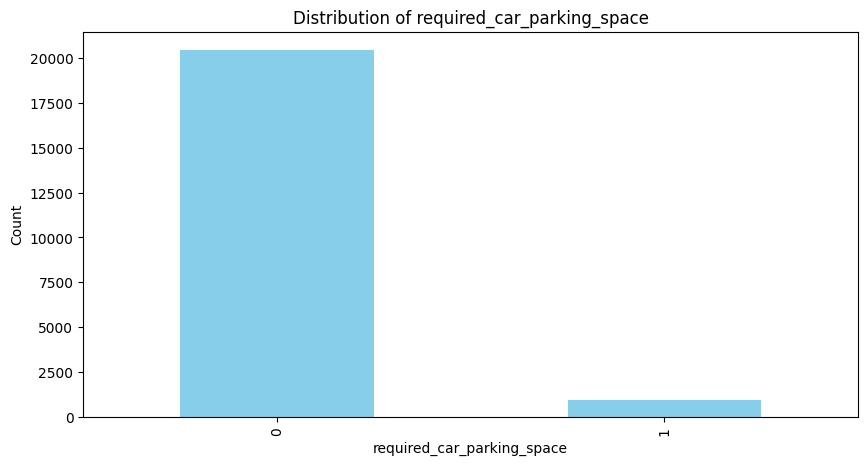

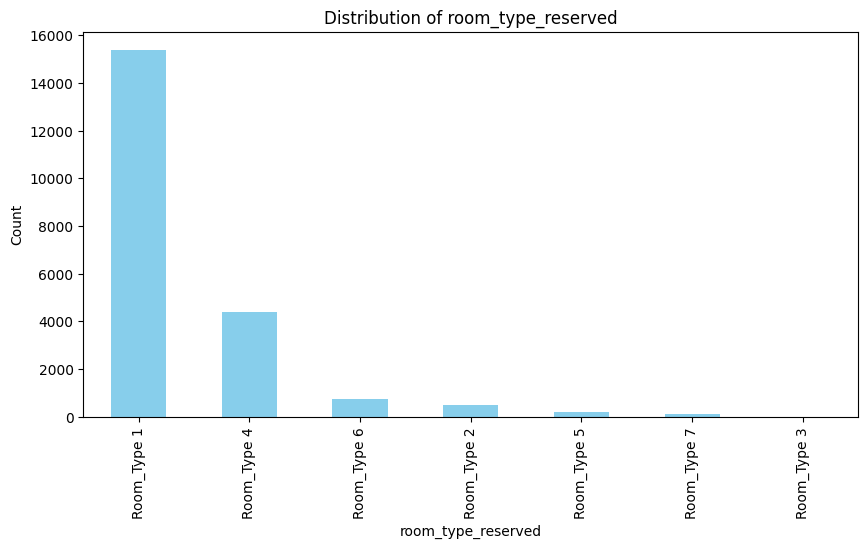

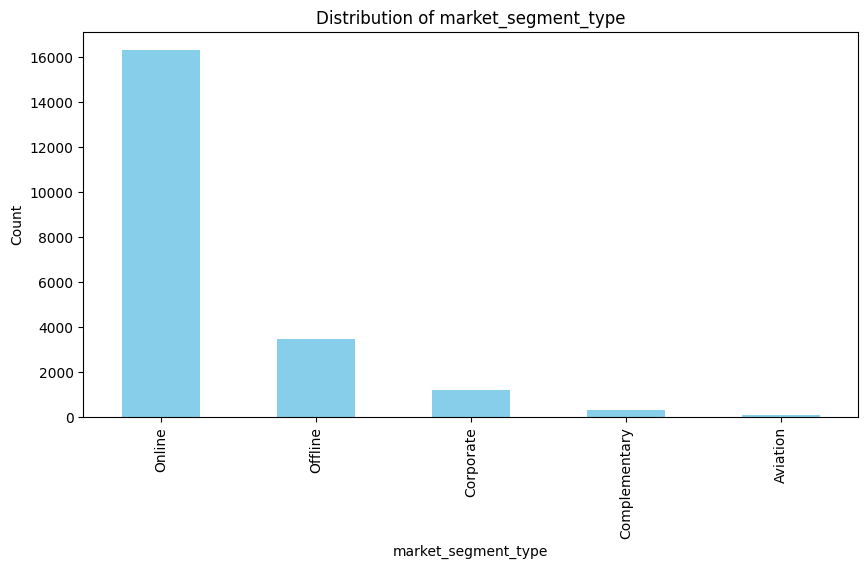

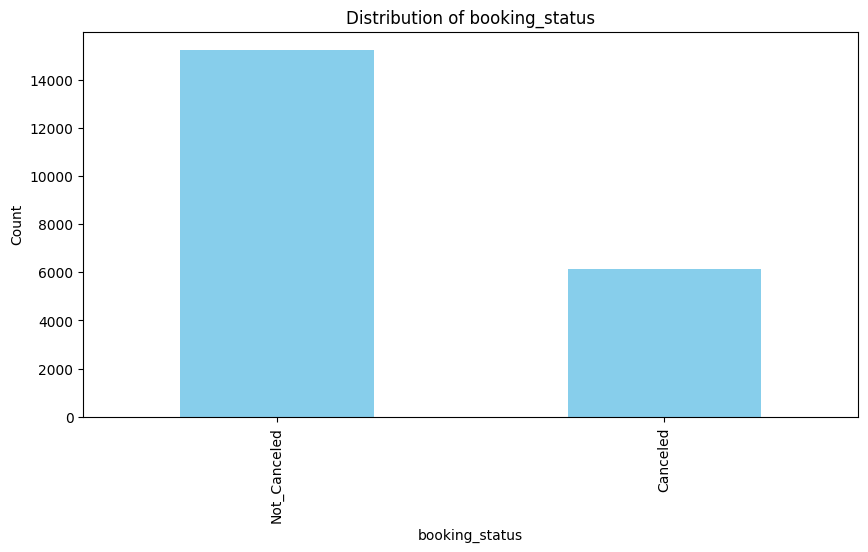

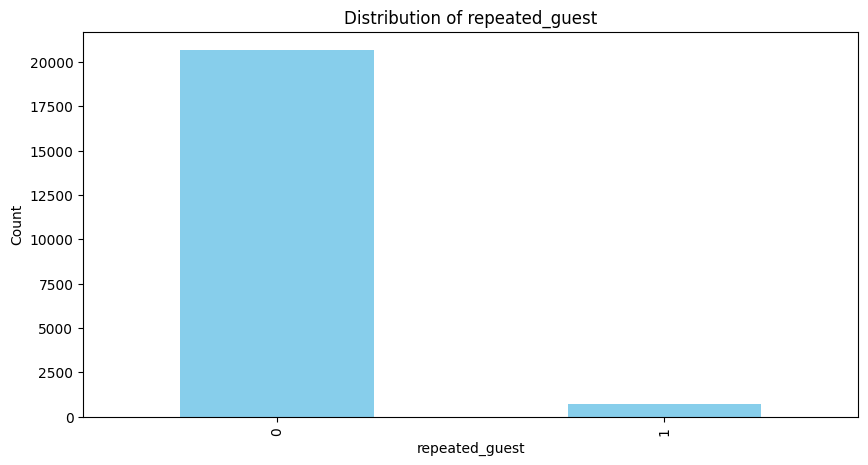

In [81]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 5))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

#### BIVARIATE ANALYSIS

In [82]:
# First we'll compare 2 numerical columns against each other
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], color='blue')
        axes[i].set_title(f'Boxplot of {column} vs {target}')

    plt.tight_layout()
    plt.show()

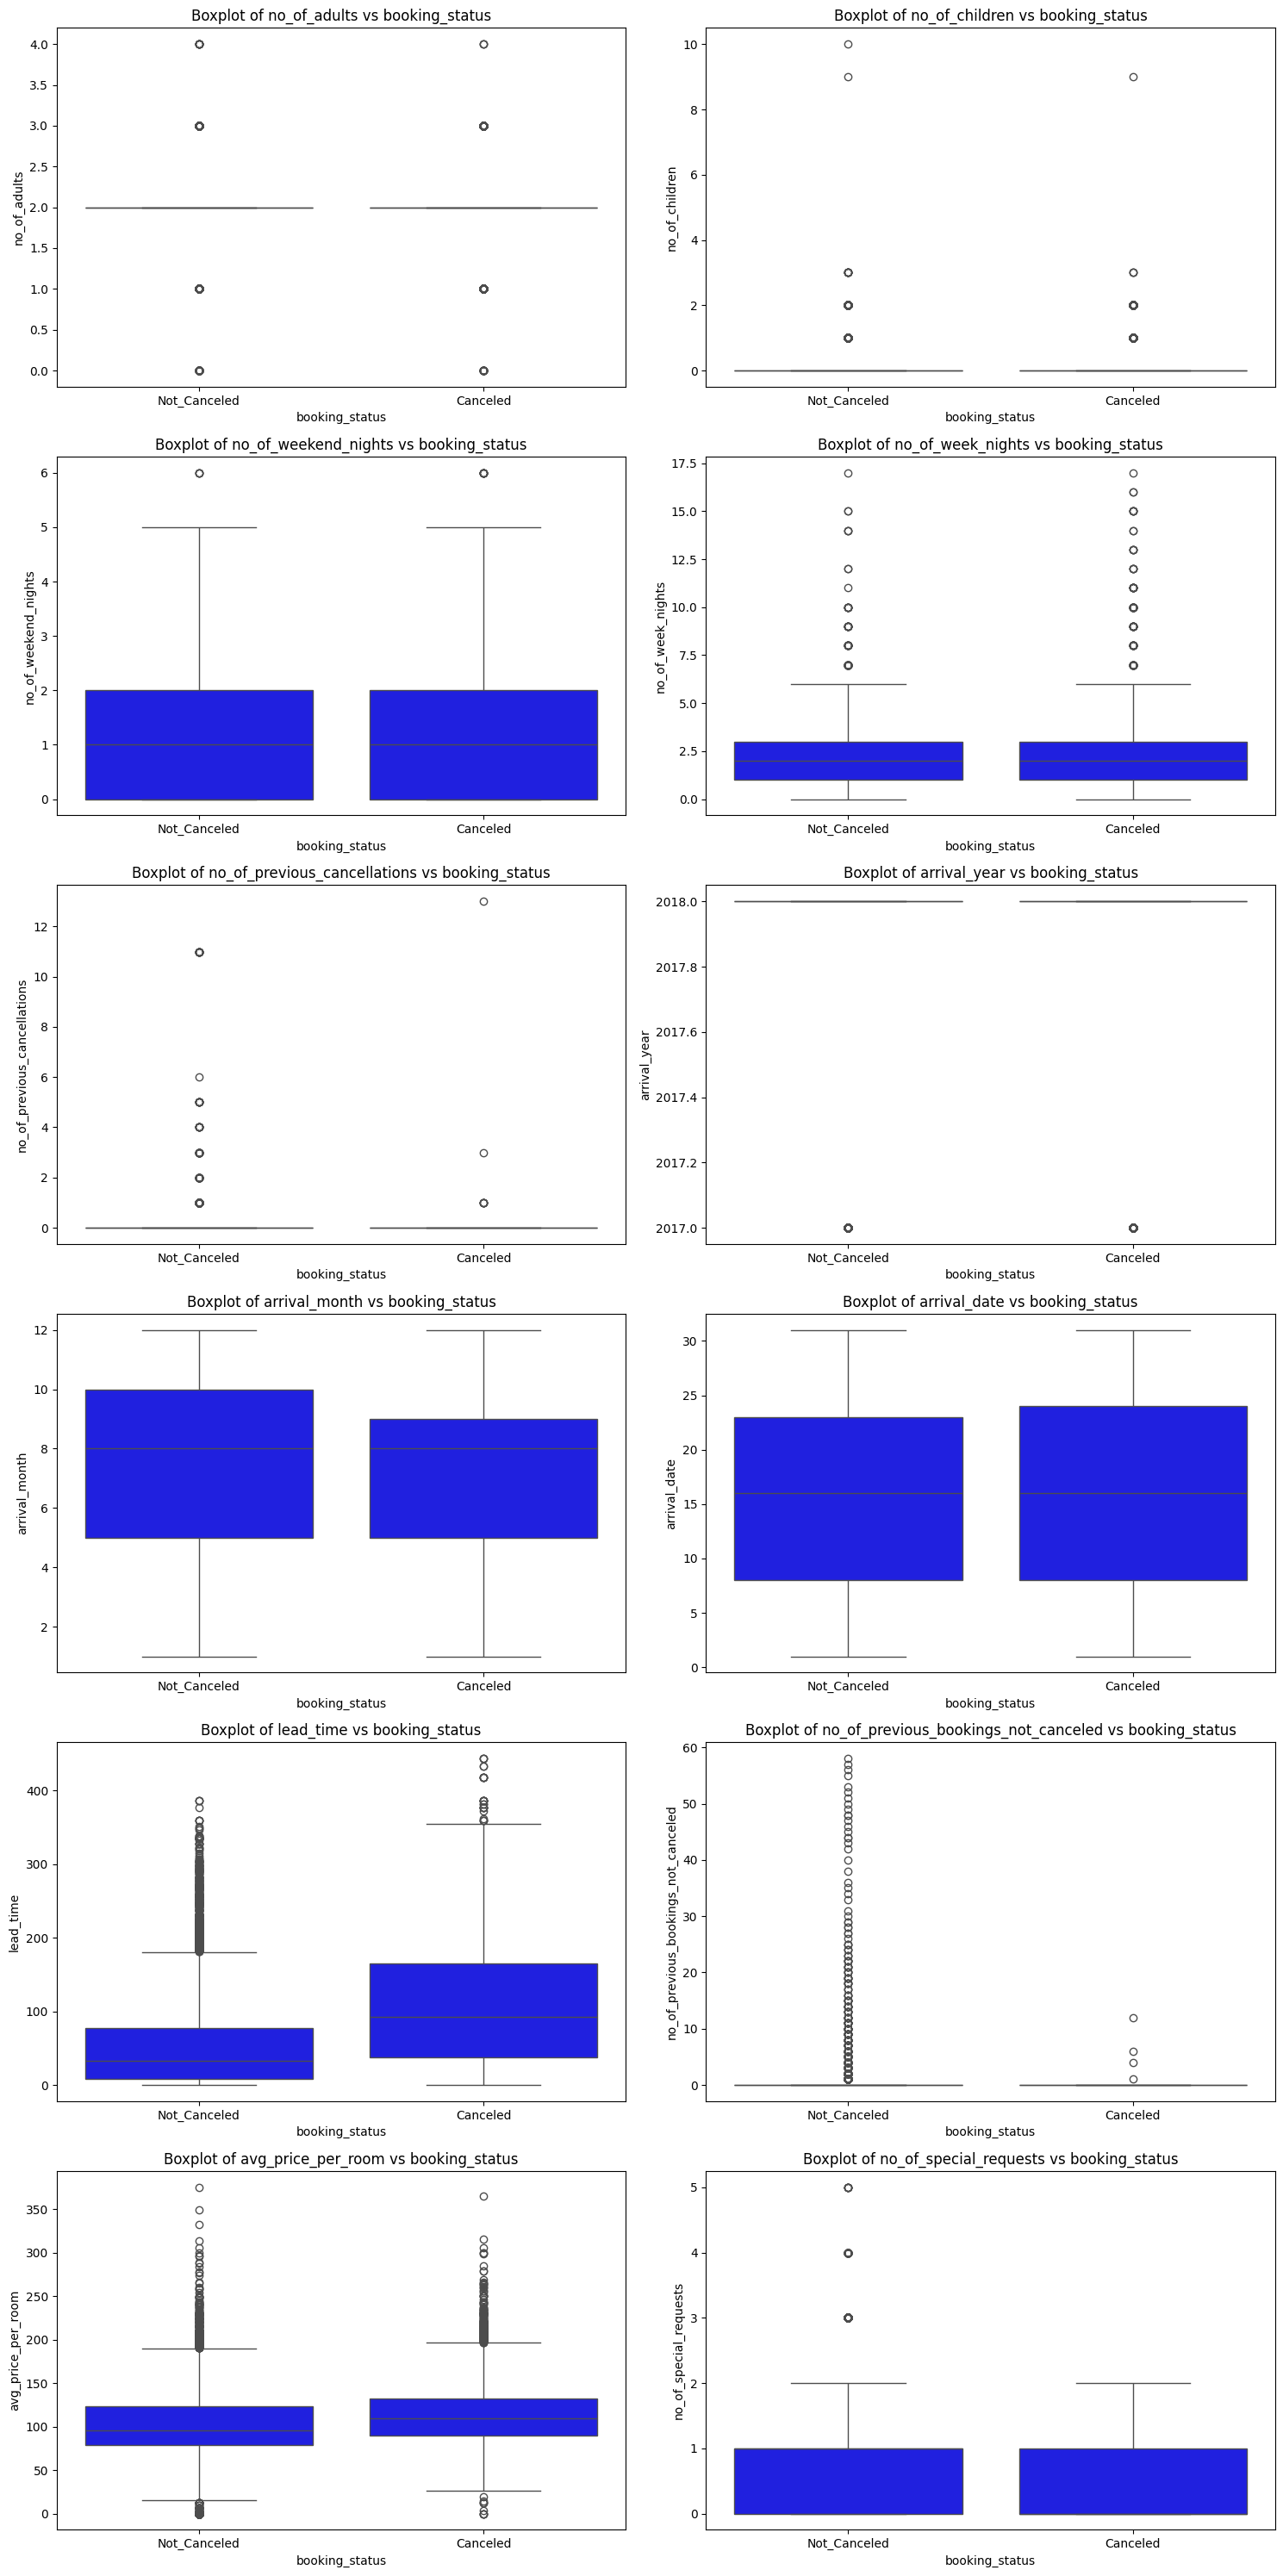

In [83]:
plot_bivariate_num(data, 'booking_status', num_cols)

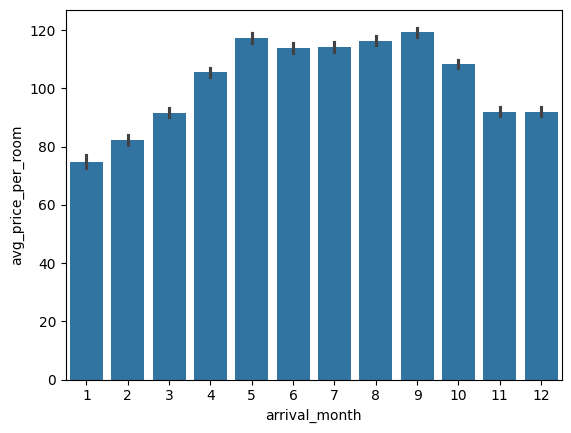

In [84]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data = data)
plt.show()

#### Less customers, decrease the room price, More customers, increase the room price

In [85]:
def plot_bivariate_cat(df, target, cat_features):
    num_plot = len(cat_features)
    num_rows = (num_plot+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(cat_features):  # column = feature
        sns.countplot(data=df, x=column, hue=target, ax=axes[i], palette='Set2')
        axes[i].set_title(f'Countplot of {column} vs {target}')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

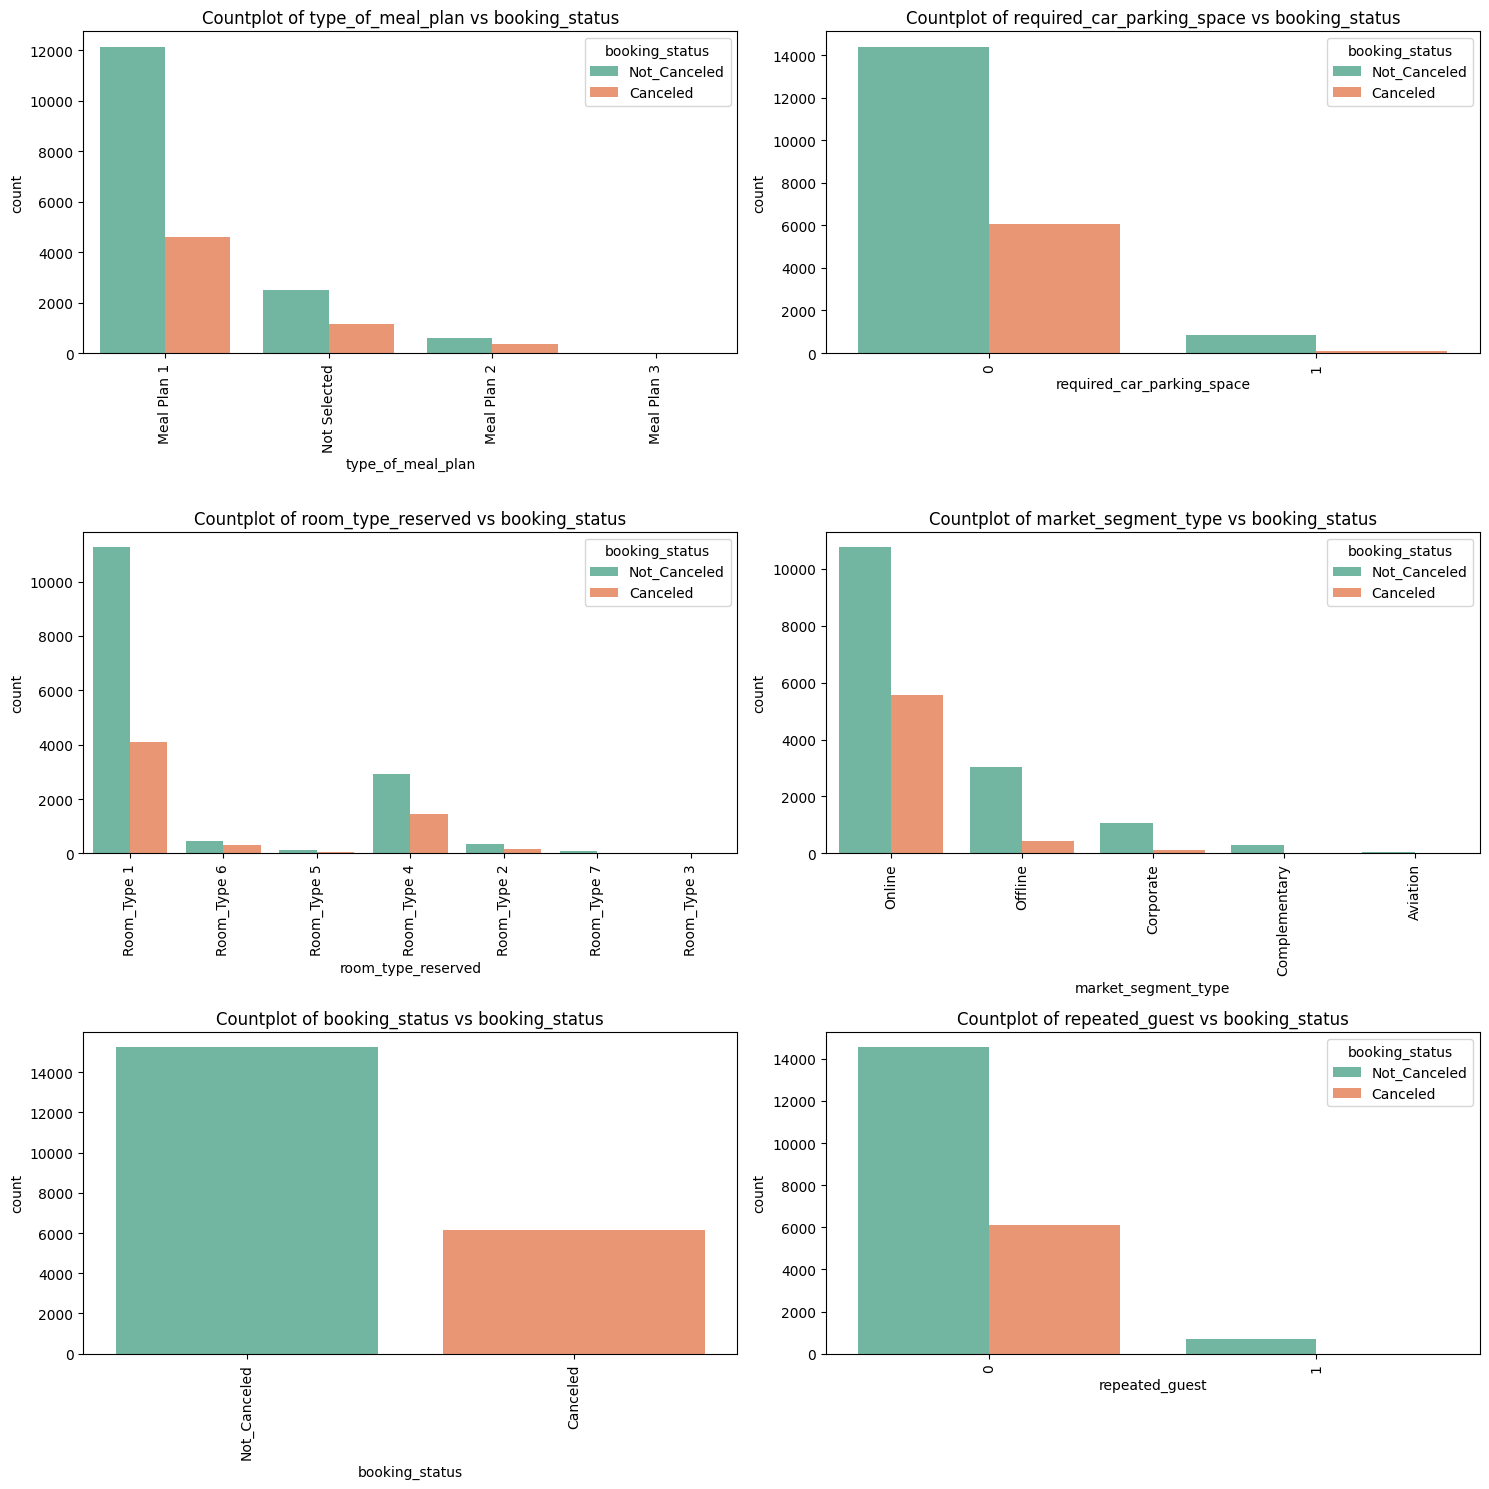

In [86]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [87]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [96]:
#### LABEL ENCONDING ####
from sklearn.preprocessing import LabelEncoder

In [97]:
label_encoder = LabelEncoder()
mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}   # type: ignore


In [100]:
mappings

{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4),
  np.int64(5): np.int64(5),
  np.int64(6): np.int64(6)},
 'market_segment_type': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4)},
 'booking_status': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [101]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [104]:
### Multicollinearity ###
!pip install statsmodels

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.7 MB 4.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.7 MB 5.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.7 MB 5.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.7 MB 4.8 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.7 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.7 MB 4.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.7 MB 4.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.7 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.7 MB 3.9 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.7 MB 3.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.7 MB 3.5 MB/s eta 0:00:01
   -----------------------

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [106]:
X = add_constant(df) 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [107]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [108]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


##### Our data doesn't have any multicollinearity

In [120]:
corr = df.corr()

<Axes: >

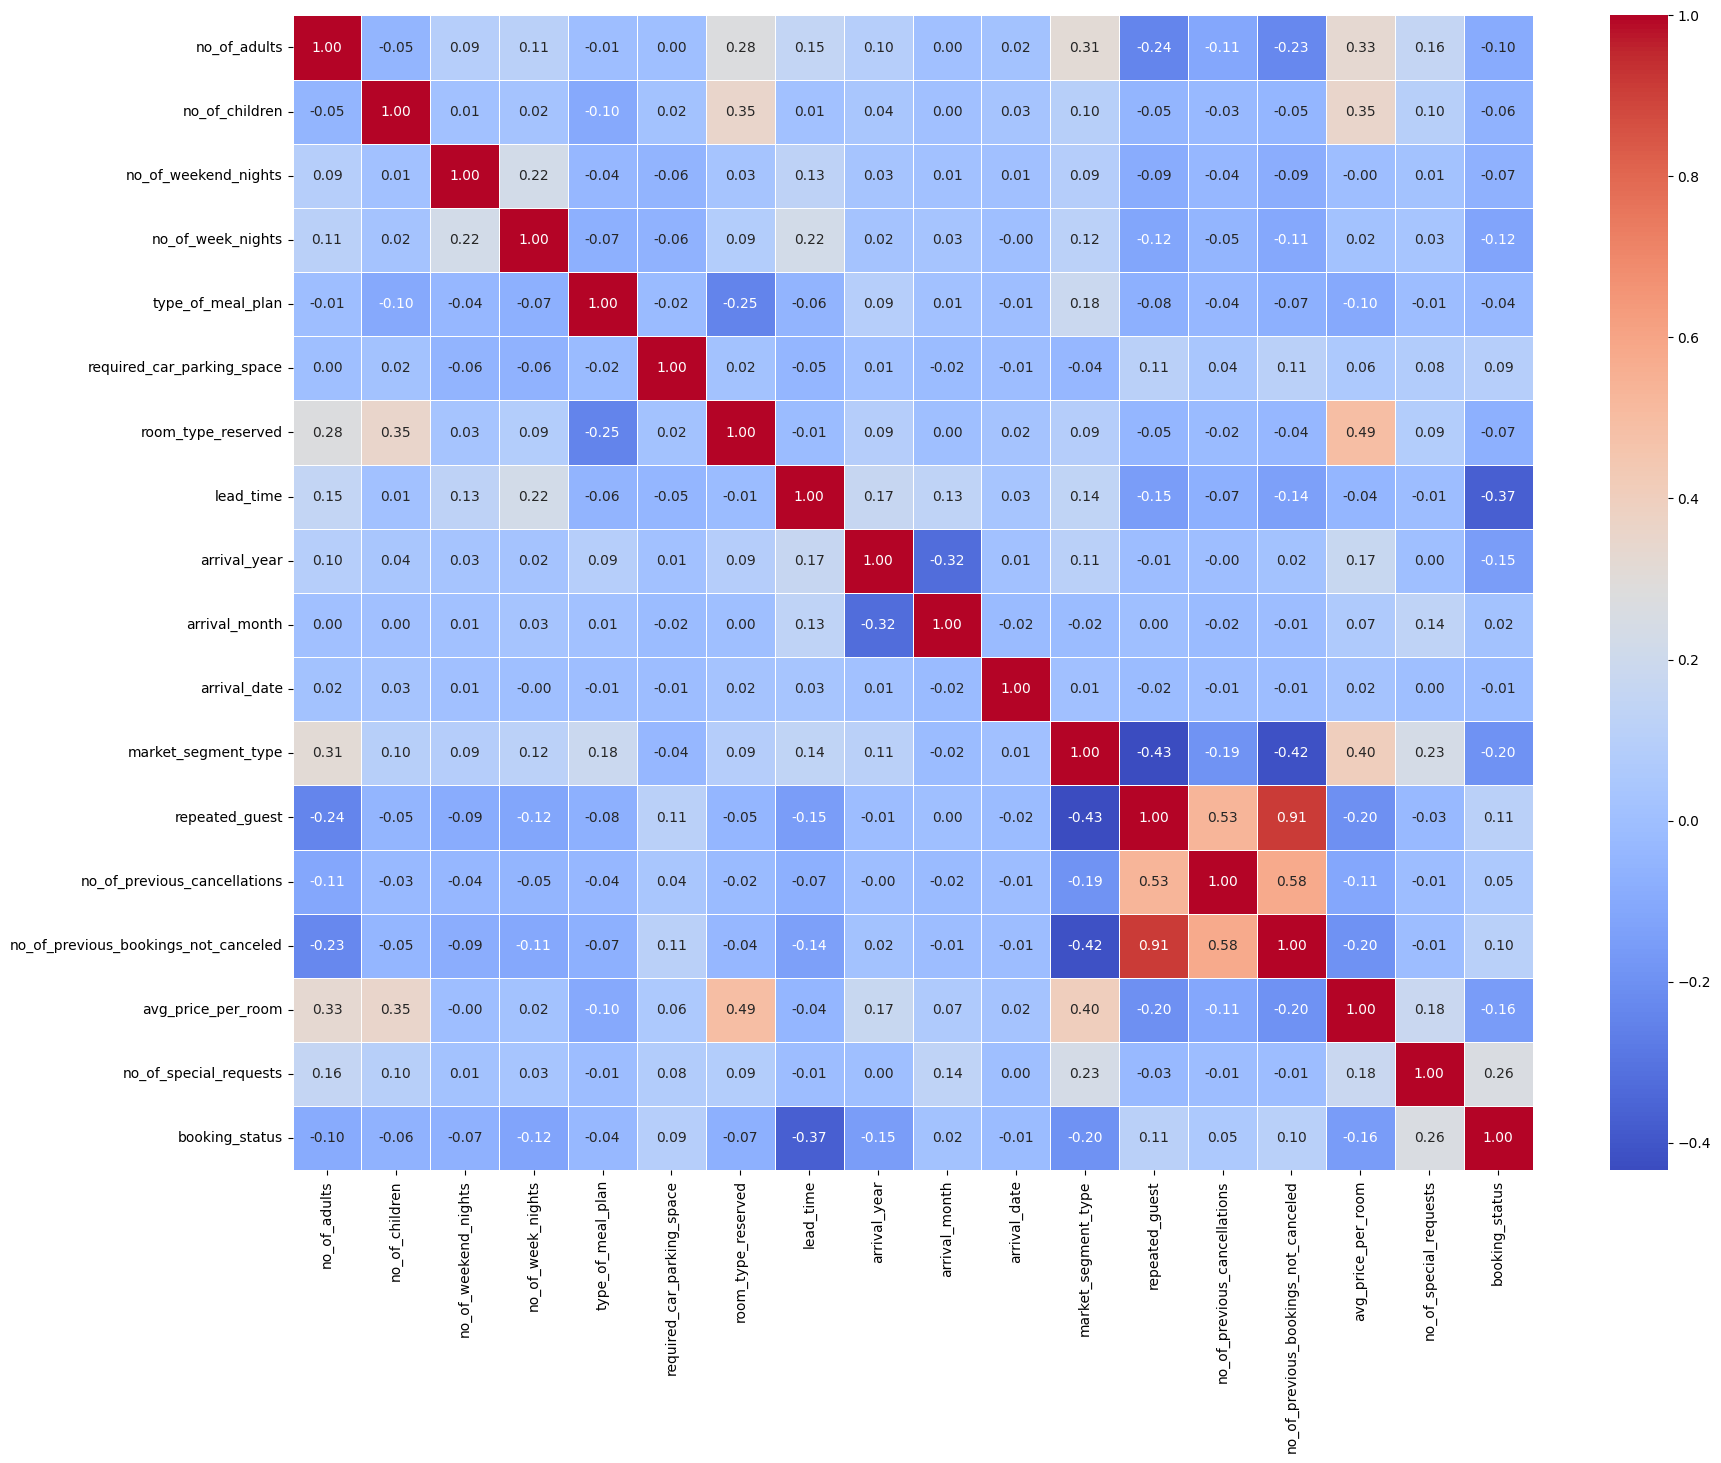

In [121]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True,linewidths=0.5 ,cmap='coolwarm', fmt='.2f')

In [ ]:
#### Skewness ####

skewness = df.skew()  
skewness   # Check skewness after transformation

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            11.240884
no_of_previous_bookings_not_canceled     6.427598
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [117]:
# For skewness handling, we'll apply log transformation to the skewed features
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [ ]:
skewness  # Check skewness before transformation

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [ ]:
df["booking_status"].value_counts()  # Imbalanced data

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [124]:
# Oversampling the minority class
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [127]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
# !pip install imbalanced-learn
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) # type: ignore

In [132]:
X_resampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0


In [135]:
# y_resampled
y_resampled.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [136]:
df.shape

(21359, 18)

In [137]:
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df["booking_status"] = y_resampled
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [138]:
balanced_df.shape

(30462, 18)

In [139]:
df = balanced_df.copy()  # Update df with the balanced data
df.shape

(30462, 18)

#### FEATURE SELECTION

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [145]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [147]:
feature_importance = model.feature_importances_

In [151]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})
top_features = feature_importance_df.sort_values(by='importance', ascending=False)
top_features

,feature,importance
7,lead_time,0.261404
16,no_of_special_requests,0.182996
15,avg_price_per_room,0.148409
9,arrival_month,0.087435
10,arrival_date,0.084216
11,market_segment_type,0.058633
3,no_of_week_nights,0.044924
2,no_of_weekend_nights,0.030019
4,type_of_meal_plan,0.020352
6,room_type_reserved,0.019279


In [152]:
df.columns 

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [157]:
top_10_features = top_features["feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [158]:
len(top_10_df.columns)

11

In [159]:
df = top_10_df.copy()  # Update df with the top 10 features
df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [161]:
df = top_10_df.copy()  # Update df with the top 10 features

#### MODEL SELECTION

In [163]:
!pip install xgboost lightgbm

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.5 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [165]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest-Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [167]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "F1 Score": []
}

In [168]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Recall"].append(recall)
    metrics["Precision"].append(precision)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [172]:
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.890858,0.893160,0.890549,0.891852
8,XGBoost,0.873133,0.885016,0.866114,0.875463
9,LightGBM,0.865419,0.888599,0.850905,0.869344
5,Decision Tree,0.841129,0.828990,0.851740,0.840211
1,Gradient Boosting,0.837026,0.867427,0.819637,0.842855
2,AdaBoost,0.804202,0.814007,0.800705,0.807301
3,Logistic Regression,0.794518,0.774919,0.809184,0.791681
7,K-Nearest-Neighbors,0.779419,0.675570,0.856317,0.755280
6,Gaussian Naive Bayes,0.773346,0.728664,0.803232,0.764133
4,SVC,0.720171,0.706840,0.729412,0.717949


In [173]:
## We will go with Random Forest as it has the highest accuracy and is a robust model for classification tasks ###
## Train the Random Forest model on the entire dataset ##

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # Faster than GridSearchCV
from scipy.stats import randint

In [176]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
rf = RandomForestClassifier(random_state=42)

In [186]:
params_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

In [187]:
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=params_dist, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=2, 
    random_state=42, 
    n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016C4EE53AF0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016C4EE53E80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016C460B6B80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016C5237A7C0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [193]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 39,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 70}

In [194]:
best_rf_model = random_search.best_estimator_

In [195]:
y_pred = best_rf_model.predict(X_test)

In [196]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [197]:
print(f"Accuracy: {accuracy:.6f}")
print(f"Recall: {recall:.6f}")
print(f"Precision: {precision:.6f}")
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.892500
Recall: 0.896417
Precision: 0.890903
F1 Score: 0.893652


In [199]:
## Save the model using joblib, in notebook directory
import joblib
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [200]:
loaded_model = joblib.load('random_forest.pkl')

In [201]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [202]:
new_data = np.array([190, 1, 93.5, 9, 8, 4, 5, 2, 0, 0])

In [203]:
predictions = loaded_model.predict(new_data.reshape(1, -1))  # Reshape to match the input shape expected by the model

In [204]:
predictions

array([1])

In [ ]:
# For Actual Model Training and Prediction, we'll use LightGBM as the pkl file produced is of small size, and will be used in production server.